Load iris data set and create a decision tree using gini index.


Decision Tree with gini index


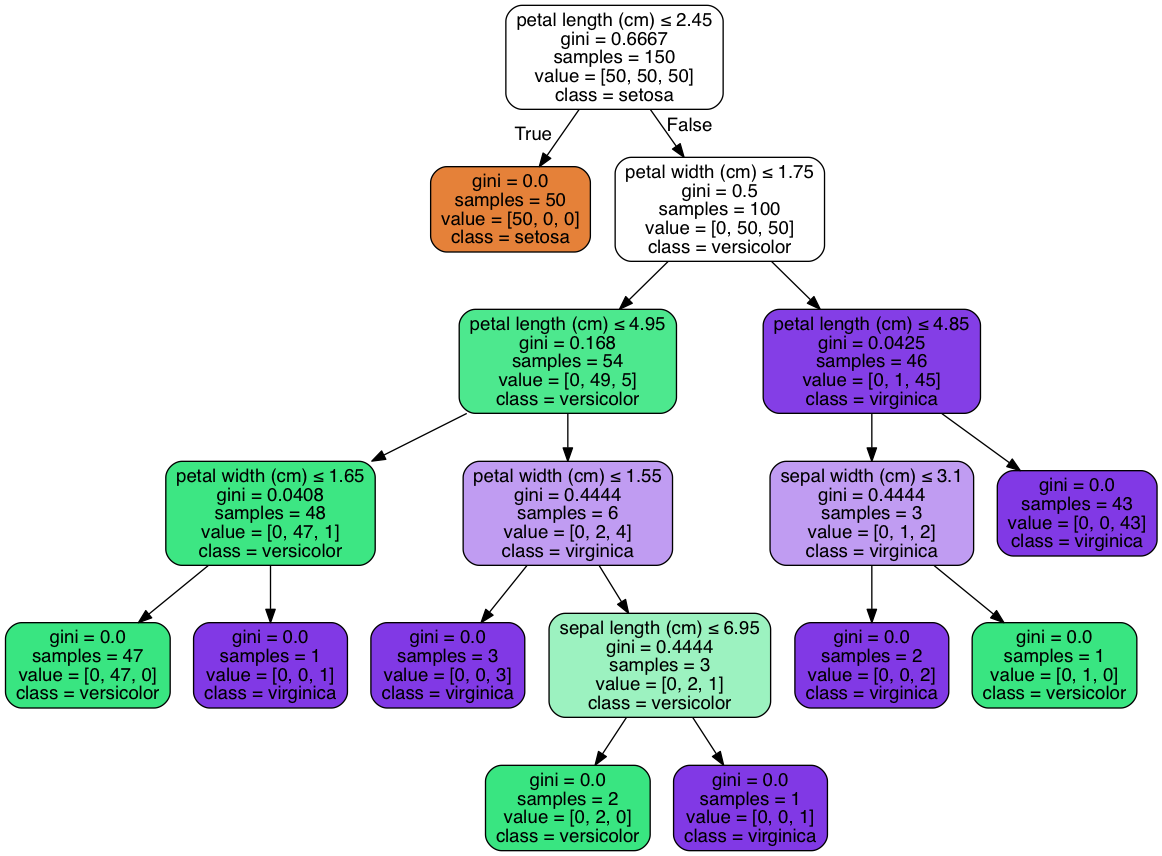

In [98]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image  
import pydotplus 

def create_tree_using_gene(iris_data, iris_target, depth):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(iris_data, iris_target)
    
    return clf;

iris = load_iris()
clf = create_tree_using_gene(iris.data, iris.target, 5)
dot_data = tree.export_graphviz(clf, out_file=None, 
                             feature_names=iris.feature_names,  
                             class_names=iris.target_names,  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 

print ("\nDecision Tree with gini index")
Image(graph.create_png()) 


Load iris data set and create a decision tree using entropy.


Decision Tree with gini index


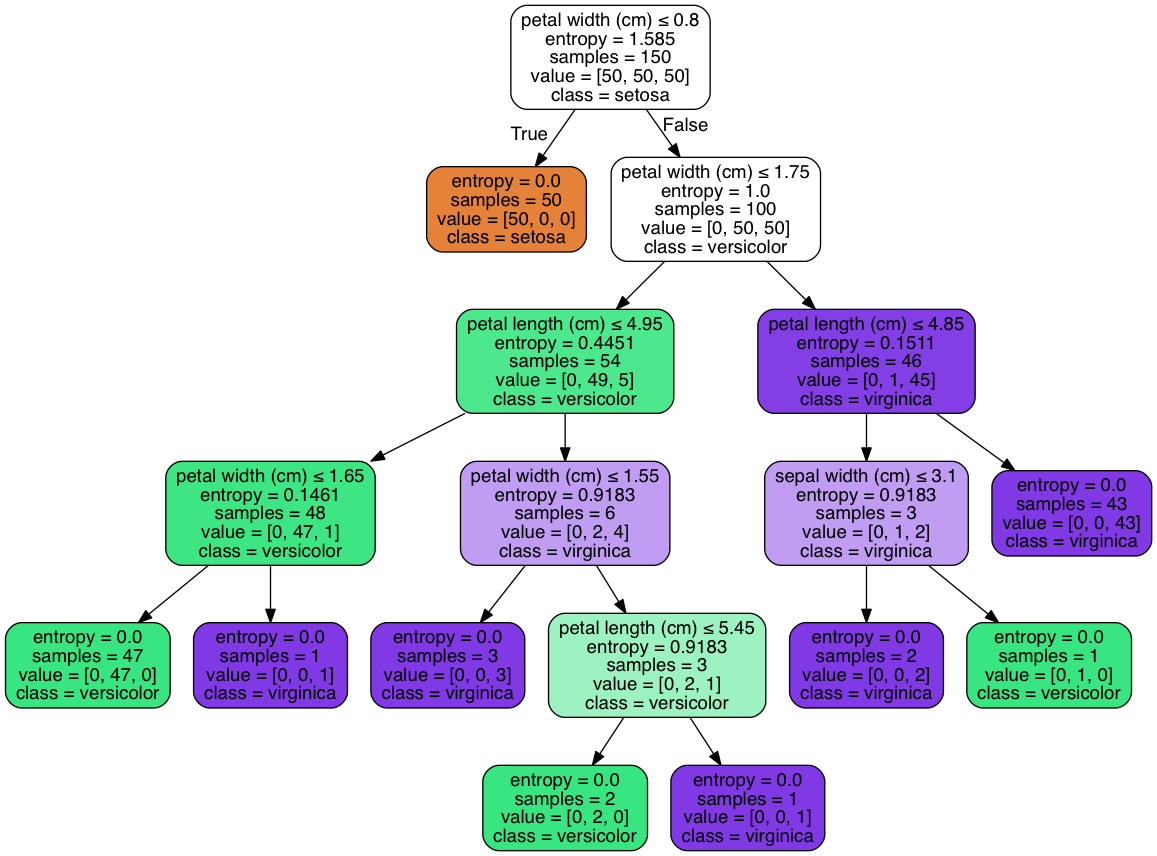

In [100]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image  
import pydotplus 

def create_tree_using_entropy(iris_data, iris_target,depth):
    clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    clf = clf.fit(iris_data, iris_target)
    
    return clf;

iris = load_iris()
clf = create_tree_using_entropy(iris.data, iris.target,5)
dot_data = tree.export_graphviz(clf, out_file=None, 
                             feature_names=iris.feature_names,  
                             class_names=iris.target_names,  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 

print ("\nDecision Tree with gini index")
Image(graph.create_png()) 


In [108]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
from sklearn import neighbors


for depth in range(1,20):
    loo = LeaveOneOut()
    total = 0
    geneSuccess = 0
    entropySuccess = 0
    knnSuccess = 0
    for train, test in loo.split(iris.data):
        total = total + 1

        testData = list()
        testTarget = list()
        for i in train:
            testData.append(iris.data[i])
            testTarget.append(iris.target[i])

        clf = create_tree_using_gene(testData, testTarget, depth)
        if clf.predict(iris.data[test]) == iris.target[test]:
            geneSuccess = geneSuccess + 1

        clf2 = create_tree_using_entropy(testData, testTarget, depth)
        if clf2.predict(iris.data[test]) == iris.target[test]:
            entropySuccess = entropySuccess + 1

        clf3 = neighbors.KNeighborsClassifier(1, weights='uniform')
        clf3.fit(testData, testTarget)
        if clf3.predict(iris.data[test]) == iris.target[test]:
            knnSuccess = knnSuccess + 1
    print "Decision Tree with max depth " + str(depth) + " success using gene :   %" + str(geneSuccess*100/total)

    print "Decision Tree with max depth " + str(depth) + " success using entopy : %" + str(entropySuccess*100/total)

print "KNN success : %" + str(knnSuccess*100/total)

    

Decision Tree with max depth 1 success using gene :   %33
Decision Tree with max depth 1 success using entopy : %33
Decision Tree with max depth 2 success using gene :   %95
Decision Tree with max depth 2 success using entopy : %95
Decision Tree with max depth 3 success using gene :   %94
Decision Tree with max depth 3 success using entopy : %95
Decision Tree with max depth 4 success using gene :   %94
Decision Tree with max depth 4 success using entopy : %94
Decision Tree with max depth 5 success using gene :   %94
Decision Tree with max depth 5 success using entopy : %94
Decision Tree with max depth 6 success using gene :   %95
Decision Tree with max depth 6 success using entopy : %94
Decision Tree with max depth 7 success using gene :   %95
Decision Tree with max depth 7 success using entopy : %94
Decision Tree with max depth 8 success using gene :   %94
Decision Tree with max depth 8 success using entopy : %94
Decision Tree with max depth 9 success using gene :   %94
Decision Tree 